# Notebook to Make Lorenz Curves

In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from matplotlib.legend_handler import HandlerLine2D

### Data In

In [2]:
# File paths

data_raw = '/Users/cascade/Github/NTL/data/raw/'
data_temp = '/Users/cascade/Github/NTL/temp_data/'
data_interim = '/Users/cascade/Github/NTL/data/interim/'
ms_data = '/Users/cascade/Github/NTL/temp_data/MS_Data/'
erl_data = '/Users/cascade/Github/NTL/temp_data/ERL_data/'
downloads = '/Users/cascade/Downloads/'

In [86]:
# Data

# GHS2000 = gpd.read_file(erl_data+'GHS_POP_GPW42000_final20190122.shp')
# GHS2015 = gpd.read_file(erl_data+'GHS_POP_GPW42015_final20190122.shp')
# WP2000 = gpd.read_file(erl_data+'AFR_PPP_2000_adj_v2_final20190122.shp')
# WP2015 = gpd.read_file(erl_data+'AFR_PPP_2015_adj_v2_final20190122.shp')
# LS2015 = gpd.read_file(erl_data+'WPE_1KM_2016_final20190122.shp')
# WPE2016 = gpd.read_file(erl_data+'LS15_final20190122.shp')

# Data with Rain Zones & Regions & FIDs Dropped (2019-02-13)

GHS2000 = gpd.read_file(erl_data+'GHS_POP_GPW42000_20190213.shp')
GHS2015 = gpd.read_file(erl_data+'GHS_POP_GPW42015_20190213.shp')
WP2000 = gpd.read_file(erl_data+'AFR_PPP_2000_adj_v2_20190213.shp')
WP2015 = gpd.read_file(erl_data+'AFR_PPP_2015_adj_v2_20190213.shp')
LS2015 = gpd.read_file(erl_data+'WPE_1KM_2016_20190213.shp')
WPE2016 = gpd.read_file(erl_data+'LS15_20190213.shp')

In [87]:
# List of datasets

datasets_in = [GHS2000, GHS2015, WP2000, WP2015, LS2015, WPE2016]

In [ ]:
GHS2000.head()

### Add Rain Zones & Regions

In [ ]:
### List of African Countries from the UN in OSM wiki

Northern_Africa = (['Algeria', 'Egypt', 'Libya', 'Morocco', 'Tunisia', 'Western Sahara'], 'Northern_Africa')

Eastern_Africa = ([
    'Burundi',
    'Comoros',
    'Djibouti',
    'Eritrea',
    'Ethiopia',
    'Kenya',
    'Madagascar',
    'Malawi',
    'Mauritius',
    #Mayotte,
    'Mozambique',
    'Réunion',
    'Rwanda',
    'Somalia',
    'Sudan',
    'Uganda',
    'Tanzania',
    'Zambia',
    'Zimbabwe'], 'Eastern_Africa')
    
Middle_Africa = ([
    'Angola',
    'Cameroon',
    'Central African Republic',
    'Chad',
    'Congo-Brazzaville',
    'Congo-Kinshasa',
    'Equatorial Guinea',
    'Gabon',
    'Sao Tome and Principe'], 'Middle_Africa')
    
Southern_Africa = ([
    'Botswana',
    'Lesotho',
    'Namibia',
    'South Africa',
    'Swaziland'], 'Southern_Africa')
    
Western_Africa = ([
    'Benin',
    'Burkina Faso',
    'Cape Verde',
    'Côte d\'Ivoire',
    'Gambia',
    'Ghana',
    'Guinea',
    'Guinea-Bissau',
    'Liberia',
    'Mali',
    'Mauritania',
    'Niger',
    'Nigeria',
    'Senegal',
    'Sierra Leone',
    'Togo'], 'Western_Africa')

In [ ]:
regions = [Northern_Africa, Western_Africa, Eastern_Africa, Southern_Africa, Middle_Africa]

In [ ]:
def region_col(gpd_df, regions_tuple, col_name_in, new_col):
    """
    Function searchs a col of a data frame and matches it with a list of 
    tuples of which [0] countains a list of values to be cross referenced
    & then makes a new col with the tuple [1] ... For example, you have a col with countries
    and you want to make a new col listing the region that country is apart of
    """
    arr = []
    for i, row in gpd_df.iterrows():
        for region in regions_tuple:
            for country in region[0]:
                if row[col_name_in] == country:
                    name = region[1]
                    arr.append(name)
                    break
    gpd_df[new_col] = arr
    return gpd_df

In [ ]:
for dataset in datasets_in:
    dataset = region(dataset, regions, 'country', 'region')

In [ ]:
GHS2000.iloc[2500:2510]

In [ ]:
# Group my rainfall zone

arid = (['Temperate / arid', 
         'Subtropic - warm / arid', 
         'Subtropic - cool / arid', 
         'Tropic - warm / arid',
         'Tropic - cool / arid'], 'Arid')

semi_arid = (['Temperate / Semi-arid', 
              'Subtropic - warm / semiarid', 
              'Subtropic - cool / semiarid',
              'Tropic - warm / semiarid', 
              'Tropic - cool / semiarid'], 'Semi-arid')    

sub_humid = (['Temperate / sub-humid', 
              'Subtropic - warm / subhumid', 
              'Subtropic - cool / subhumid',
              'Tropic - warm / subhumid', 
              'Tropic - cool / subhumid'], 'Sub-humid')

humid = (['Temperate / humid', 
          'Subtropic - warm / humid', 
          'Subtropic - cool / humid', 
          'Tropic - warm / humid',
          'Tropic - cool / humid'], 'Humid')

boreal = (['Boreal'], 'Boreal')

na = (['NoClass', '0'], 'NA')

rain_list = [arid, semi_arid, sub_humid, humid, boreal, na]

In [ ]:
for dataset in datasets_in:
    dataset = region(dataset, rain_list, 'aez_class', 'rain_zone')

In [5]:
# Drop Duplicate FIDs (Polygons) and <5000 people 

print('1---WP2015---') # World Pop 2015

# drop FID
print(len(WP2015))
WP2015 = WP2015.drop_duplicates('FID', keep = 'first')
print(len(WP2015))

# drop <5000
WP2015 = WP2015[WP2015['PopTot'] > 5000]
print(len(WP2015))

print('2---LS2015---') # LandScan 2015
# drop FID
print(len(LS2015))
LS2015 = LS2015.drop_duplicates('FID', keep = 'first')
print(len(LS2015))

# drop <5000
LS2015 = LS2015[LS2015['PopTot'] > 5000]
print(len(LS2015))

print('3---WPE2016---') # WPE 2016
# drop FID
print(len(WPE2016))
WPE2016 = WPE2016.drop_duplicates('FID', keep = 'first')
print(len(WPE2016))

# drop <5000
WPE2016 = WPE2016[WPE2016['PopTot'] > 5000]
print(len(WPE2016))

print('4---GHS2015---') # GHS 2015
# drop FID
print(len(GHS2015))
GHS2015 = GHS2015.drop_duplicates('FID', keep = 'first')
print(len(GHS2015))

# drop <5000
GHS2015 = GHS2015[GHS2015['PopTot'] > 5000]
print(len(GHS2015))

print('5---GHS2000---') # GHS 2000
# drop FID
print(len(GHS2000))
GHS2000 = GHS2000.drop_duplicates('FID', keep = 'first')
print(len(GHS2000))

# drop <5000
GHS2000 = GHS2000[GHS2000['PopTot'] > 5000]
print(len(GHS2000))

      
print('6---WP2000---') # World Pop 2000

# drop FID
print(len(WP2000))
WP2000 = WP2000.drop_duplicates('FID', keep = 'first')
print(len(WP2000))

# drop <5000
WP2000 = WP2000[WP2000['PopTot'] > 5000]
print(len(WP2000))

1---WP2015---
3854
2616
2411
2---LS2015---
5598
4217
3801
3---WPE2016---
5552
4347
3643
4---GHS2015---
6229
5026
4162
5---GHS2000---
5854
4951
3858
6---WP2000---
3152
2259
2061


# SAVE OUT

On 2019-02-13 CPT saved out all files, with FID duplicates dropped (thus losing unique OSM labels for some polygons), and regions and rain_zones added

In [ ]:
# GHS2000.to_file(erl_data+'GHS_POP_GPW42000_20190213.shp', driver = 'ESRI Shapefile')
# GHS2015.to_file(erl_data+'GHS_POP_GPW42015_20190213.shp', driver = 'ESRI Shapefile')
# WP2000.to_file(erl_data+'AFR_PPP_2000_adj_v2_20190213.shp', driver = 'ESRI Shapefile')
# WP2015.to_file(erl_data+'AFR_PPP_2015_adj_v2_20190213.shp', driver = 'ESRI Shapefile')
# LS2015.to_file(erl_data+'WPE_1KM_2016_20190213.shp', driver = 'ESRI Shapefile')
# WPE2016.to_file(erl_data+'LS15_20190213.shp', driver = 'ESRI Shapefile')

### Lorzen Curves

https://zhiyzuo.github.io/Plot-Lorenz/

#### Functions

In [6]:
def gini(arr):
    ## first sort
    sorted_arr = arr.copy()
    sorted_arr.sort()
    n = arr.size
    coef_ = 2. / n
    const_ = (n + 1.) / n
    weighted_sum = sum([(i+1)*yi for i, yi in enumerate(sorted_arr)])
    return coef_*weighted_sum/(sorted_arr.sum()) - const_

In [7]:
def lorenz_curve(X):
    X_lorenz = X.cumsum() / X.sum()
    X_lorenz = np.insert(X_lorenz, 0, 0) 
    X_lorenz[0], X_lorenz[-1]
    fig, ax = plt.subplots(figsize=[6,6])
    ## scatter plot of Lorenz curve
    ax.scatter(np.arange(X_lorenz.size)/(X_lorenz.size-1), X_lorenz, 
               marker='x', color='darkgreen', s=100)
    ## line plot of equality
    ax.plot([0,1], [0,1], color='k')

#### Select data

In [ ]:
## Rain Zone
# X = np.sort(np.array(GHS2000[GHS2000['rain_zone'] == 'Semi-arid'].PopTot))
# Y = np.sort(np.array(GHS2015[GHS2015['rain_zone'] == 'Semi-arid'].PopTot))

# print(len(X))
# print(len(Y))
## Country
# X = np.sort(np.array(GHS2000[GHS2000['country'] == 'South Africa'].PopTot))
# Y = np.sort(np.array(GHS2015[GHS2015['country'] == 'South Africa'].PopTot))

## All Africa 
# X = np.sort(np.array(GHS2000.PopTot))
# Y = np.sort(np.array(GHS2015.PopTot))

## Conditional
# X = np.sort(np.array(GHS2000[GHS2000['PopTot'] < 5*10**6].PopTot))
# Y = np.sort(np.array(GHS2015[GHS2015['PopTot'] < 5*10**6].PopTot))

# X = GHS2000.loc[(GHS2000['rain_zone'] == 'Arid') & (GHS2000['country'] != 'Egpyt')]
# X = np.sort(np.array(X.PopTot))

# Y = GHS2015.loc[(GHS2015['rain_zone'] == 'Arid') & (GHS2015['country'] != 'Egpyt')]
# Y = np.sort(np.array(Y.PopTot))


# X = X[(X < 5*10**6)]
# Y = Y[(Y < 5*10**6)]

print(len(X))
print(len(Y))

In [ ]:
# Curves 

# A = np.sort(np.array(GHS2000[GHS2000['country'] == 'Ghana'].PopTot))
# B = np.sort(np.array(GHS2000[GHS2000['country'] == 'Nigeria'].PopTot))
# C = np.sort(np.array(GHS2000[GHS2000['country'] == 'Zambia'].PopTot))

# A_lorenz = A.cumsum() / A.sum()
# A_lorenz = np.insert(A_lorenz, 0, 0)
# A_lorenz[0], A_lorenz[-1]

# B_lorenz = B.cumsum() / B.sum()
# B_lorenz = np.insert(B_lorenz, 0, 0)
# B_lorenz[0], B_lorenC[-1]

# C_lorenz = C.cumsum() / C.sum()
# C_lorenz = np.insert(C_lorenz, 0, 0)
# C_lorenz[0], C_lorenz[-1]

In [ ]:
# Curves 

title = 'Africa'

V = np.sort(np.array(GHS2000.PopTot))
W = np.sort(np.array(GHS2015.PopTot))

#V = np.sort(np.array(GHS2000[GHS2000['country'] == title].PopTot))
#W = np.sort(np.array(GHS2015[GHS2015['country'] == title].PopTot))

# W = np.sort(np.array(GHS2015[GHS2015['country'] == 'South Africa'].PopTot))
# X = np.sort(np.array(GHS2015[GHS2015['country'] == 'Ghana'].PopTot))
# Y = np.sort(np.array(GHS2015[GHS2015['country'] == 'Nigeria'].PopTot))
# Z = np.sort(np.array(GHS2015[GHS2015['country'] == 'Zambia'].PopTot))

# V_lorenz = V.cumsum() / V.sum()
# V_lorenz = np.insert(V_lorenz, 0, 0)
# V_lorenz[0], V_lorenz[-1]

# W_lorenz = W.cumsum() / W.sum()
# W_lorenz = np.insert(W_lorenz, 0, 0)
# W_lorenz[0], W_lorenz[-1]

# X_lorenz = X.cumsum() / X.sum()
# X_lorenz = np.insert(X_lorenz, 0, 0)
# X_lorenz[0], X_lorenz[-1]

# Y_lorenz = Y.cumsum() / Y.sum()
# Y_lorenz = np.insert(Y_lorenz, 0, 0)
# Y_lorenz[0], Y_lorenz[-1]

# Z_lorenz = Z.cumsum() / Z.sum()
# Z_lorenz = np.insert(Z_lorenz, 0, 0)
# Z_lorenz[0], Z_lorenz[-1]

In [57]:
## Rain Zone
title = 'Ethiopia'
col = 'country'
X = np.sort(np.array(GHS2000[GHS2000[col] == title].PopTot))
Y = np.sort(np.array(GHS2015[GHS2015[col] == title].PopTot))

## All Africa
# title = 'Africa'
# X = np.sort(np.array(GHS2000.PopTot))
# Y = np.sort(np.array(GHS2015.PopTot))

X = X[(X < 5*10**6)]
Y = Y[(Y < 5*10**6)]

X_lorenz = X.cumsum() / X.sum()
X_lorenz = np.insert(X_lorenz, 0, 0)
X_lorenz[0], X_lorenz[-1]

Y_lorenz = Y.cumsum() / Y.sum()
Y_lorenz = np.insert(Y_lorenz, 0, 0)
Y_lorenz[0], Y_lorenz[-1]

(0.0, 1.0)

In [120]:
print(len(Z))
print(len(Pop))
len(Z_lorenz)

3854
3855


3855

In [168]:
# find thresholds of urban population held by settlment rank
title = 'Sub-humid'
col = 'rain_zone'
dataset = GHS2015
#Z = np.sort(np.array(dataset[dataset[col] == title].PopTot))
Z = np.sort(np.array(dataset.PopTot))

Z = Z[(Z < 5*10**6)]

Z_lorenz = Z.cumsum() / Z.sum()
Z_lorenz = np.insert(Z_lorenz, 0, 0)
Z_lorenz[0], Z_lorenz[-1]

Pop = np.insert(Z, 0, 0)

df = pd.DataFrame()
df['x-axis'] = np.arange(Z_lorenz.size)/(Z_lorenz.size-1)
df['y-axis'] = Z_lorenz
df['PopTot'] = Pop

In [171]:
df[3720:3800]

,x-axis,y-axis,PopTot
3720,0.895522,0.346877,149510.395386
3721,0.895763,0.347283,149858.276978
3722,0.896004,0.347690,150209.297333
3723,0.896245,0.348097,150345.026276
3724,0.896485,0.348504,150360.147430
3725,0.896726,0.348913,150963.906952
3726,0.896967,0.349322,150965.038727
3727,0.897208,0.349732,151307.318329
3728,0.897448,0.350145,152185.306854
3729,0.897689,0.350559,152923.925751


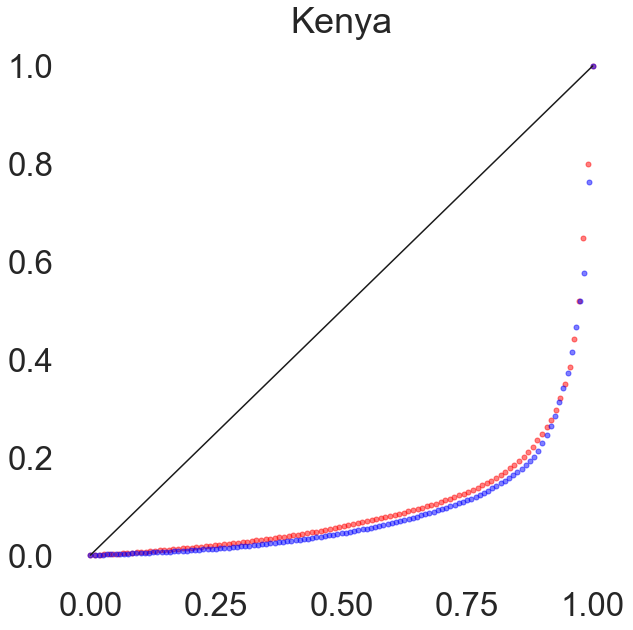

In [39]:
%matplotlib inline

## Size & number
sns.set(font_scale=3)
fig, ax1 = plt.subplots(nrows=1, ncols=1,  figsize=(10, 10))


## scatter plot of Lorenz curve
# ax1.scatter(np.arange(V_lorenz.size)/(V_lorenz.size-1), V_lorenz, 
#            marker='.', color='orange', s=100, alpha = 0.5)

# ax1.scatter(np.arange(W_lorenz.size)/(W_lorenz.size-1), W_lorenz, 
#            marker='.', color='purple', s=100, alpha = 0.5)

ax1.scatter(np.arange(X_lorenz.size)/(X_lorenz.size-1), X_lorenz, 
           marker='.', color='Red', s=100, alpha = 0.5)

ax1.scatter(np.arange(Y_lorenz.size)/(Y_lorenz.size-1), Y_lorenz, 
           marker='.', color='Blue', s=100, alpha = 0.5)

# ax1.scatter(np.arange(Z_lorenz.size)/(Z_lorenz.size-1), Z_lorenz, 
#            marker='.', color='Orange', s=100, alpha = 0.5)

# ax1.scatter(np.arange(A_lorenz.size)/(A_lorenz.size-1), A_lorenz, 
#            marker='*', color='Blue', s=100, alpha = 0.5)

# ax1.scatter(np.arange(B_lorenz.size)/(B_lorenz.size-1), B_lorenz, 
#            marker='*', color='Purple', s=100, alpha = 0.5)

# ax1.scatter(np.arange(C_lorenz.size)/(C_lorenz.size-1), C_lorenz, 
#            marker='*', color='Orange', s=100, alpha = 0.5)


## Title
plt.title(title)
leg = ['GHS 2000', 'GHS 2015']
#plt.legend(leg,loc=2, markerscale=3)

## line plot of equality
ax1.plot([0,1], [0,1], color='k')

#remove ticks
# ax.set_xticks([])
# ax.set_yticks([])

# Set Color
ax1.set_facecolor('White')

#fig.savefig('/Users/cascade/Desktop/'+title+'_Lorenz.png', dpi=700)

In [ ]:
# test = np.log(GHS2000[GHS2000['country'] == 'Nigeria'].PopTot)
test = np.log10(GHS2015.PopTot)
colors = GHS2015.rain_zone
len(test)
fig, ax = plt.subplots(figsize=[15,15])
ax = sns.swarmplot(x=test, size =4, alpha = .5, palette = colors)

# boxen plots and violent plots are cool too